Weight Uncertainty in Neural Networks, Blundell et. al.

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import numpy as np
import torch
import time
import math
import experiments.toy_regression as exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
device = torch.device("cpu")

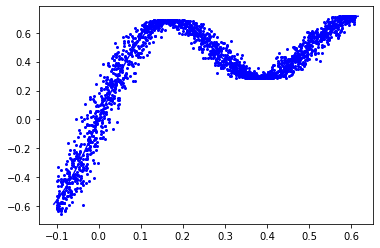

In [50]:
from training import toy

torch.manual_seed(42)

batch_size = 200

trainset = toy.TrigonometricToyDataset(sample_count=2000, noise=0.02, normalize=False, min=-0.1, max=0.61)
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True)

trainset.plot_dataset()

In [49]:
from training.bbb import MixturePrior

batch_size = 200
noise = torch.tensor(0.02).to(device) # 3, 0.02
layers = [
    (1, 16),
    (16, 16),
    (16, 16),
    (16, 1)
]
learn_var = False
prior = MixturePrior(0.25, torch.exp(torch.tensor(-0)), torch.exp(torch.tensor(-6)))

In [51]:
torch.manual_seed(42)
bbb = exp.bbb(layers, noise, learn_var, 900, trainloader, batch_size, device, mc_sample=5, prior=prior, sampling="parameters")

Generated model: Sequential(
  (0): BBBLinear()
  (1): ReLU()
  (2): BBBLinear()
  (3): ReLU()
  (4): BBBLinear()
  (5): ReLU()
  (6): BBBLinear()
)
Epoch 0: loss 1.140665888786316
Epoch 10: loss 1.1348062753677368
Epoch 20: loss 1.073958158493042
Epoch 30: loss 1.017760992050171
Epoch 40: loss 0.9624853730201721
Epoch 50: loss 0.9113297462463379
Epoch 60: loss 0.8695904612541199
Epoch 70: loss 0.8196120858192444
Epoch 80: loss 0.7878732681274414
Epoch 90: loss 0.7394283413887024
Epoch 100: loss 0.7008047699928284
Epoch 110: loss 0.6659069657325745
Epoch 120: loss 0.632794201374054
Epoch 130: loss 0.6110485792160034
Epoch 140: loss 0.587791383266449
Epoch 150: loss 0.5678530931472778
Epoch 160: loss 0.5544537305831909
Epoch 170: loss 0.541109025478363
Epoch 180: loss 0.5300852060317993
Epoch 190: loss 0.5197910666465759
Epoch 200: loss 0.5085746645927429
Epoch 210: loss 0.5000554323196411
Epoch 220: loss 0.497740238904953
Epoch 230: loss 0.49371570348739624
Epoch 240: loss 0.5103623867

ValueError: Expected value argument (Tensor of shape (16, 16)) to be within the support (Real()) of the distribution Normal(loc: 0.0, scale: 1.0), but found invalid values:
tensor([[ 1.7413e-01,  1.2055e+00, -2.4233e-01, -4.2906e-01, -4.9180e+00,
          5.3149e-01, -8.6285e+00, -1.7050e+00, -1.3580e+00, -8.6215e+00,
         -5.1792e+00,  8.2301e-01, -3.7621e+00, -7.2305e-01,  1.5446e+00,
         -4.7244e-01],
        [ 1.2786e+00, -1.3570e+00,  2.5055e-02,  1.1185e-01, -5.4268e-01,
          6.5529e-01,  4.4741e-01,  1.7922e+00, -1.2382e+00,  3.0710e-01,
         -1.1585e+00, -2.1359e+00, -1.8128e+00, -2.3968e-01,  1.8555e+00,
         -3.3655e-01],
        [ 4.3516e+00, -6.8342e-01, -1.3974e+00,  1.2204e+00, -6.2995e+01,
         -5.6339e-01, -2.0794e+02,  1.3450e+00,  8.1668e-01,         nan,
         -5.3815e+01,  1.0035e+00, -5.2491e+01, -9.1301e-01,  1.3146e+00,
         -7.9870e-01],
        [-1.0388e+00, -9.0646e-01,  5.5097e-01,  9.0611e-01, -1.2620e+00,
         -1.8624e-01, -2.1255e+00, -1.4241e+00, -7.2536e-01,  3.0493e-01,
          3.7621e-01,  2.8814e-01, -7.6901e-01, -1.2986e+00,  3.0461e-01,
         -2.0254e+00],
        [ 7.1973e-01,  3.8288e-01,  1.6709e+00,  1.8707e+00, -6.5387e-01,
         -9.8399e-01, -1.7778e-01,  9.2226e-01, -1.8872e+00, -6.7204e-01,
          2.3022e-01, -9.6520e-01,  1.0178e+00,  4.1766e-01, -1.6362e-01,
         -7.0465e-01],
        [-2.4878e+00,  8.8887e-01,  7.1084e-01, -3.2960e-01, -1.0375e+00,
         -5.1965e-01, -1.3605e+00, -2.5539e+00, -2.2779e-02,  3.1616e-01,
          1.4696e+00, -2.8701e+00, -9.9668e-01,  1.0099e-01, -1.7020e+00,
          3.2416e-01],
        [-1.8754e+00, -1.2471e+00,  1.9990e+00, -8.3923e-01,  7.1812e-01,
          1.2068e-01, -6.8892e+00, -5.0836e+00,  8.5060e-01, -5.2575e-01,
         -1.8625e+00, -9.0089e-01, -2.7052e+00, -2.1680e-01, -1.6809e+00,
         -1.8376e+00],
        [ 1.0254e+00,  1.0344e-01, -4.5556e-02,  5.0262e-01, -1.5063e+00,
          1.1325e+00, -2.0207e+00, -1.2645e-02,  5.3809e-01,  6.4453e-01,
          2.5816e-01,  3.2597e-01, -6.3634e-01,  1.3031e+00,  6.7252e-01,
          1.6232e+00],
        [ 1.5876e+00, -1.0602e+00,  2.3210e-01, -3.1704e-01,  9.3132e-01,
          4.0815e-01, -4.0316e-01,  5.1522e-01,  1.8980e+00, -7.8760e-01,
         -1.6355e+00, -1.4572e+00, -2.5380e-01,  7.1952e-01,  1.5139e+00,
          6.8127e-01],
        [-3.3537e+00,  9.9213e-01,  7.2382e-01,  8.8491e-01,  4.8611e+01,
         -1.6144e+00,  1.6575e+02,  8.3888e-01,  2.3375e-01,  2.1524e+02,
          5.7297e+01, -4.5594e-01,  8.3899e+01, -8.5298e-01, -6.3360e-01,
          1.5892e-01],
        [-3.6068e-01, -2.7060e+00, -8.0463e-01,  4.5095e-01,  8.0130e+00,
          6.2156e-02,  3.1619e+01,  1.0609e+00,  8.5853e-01,  2.1450e+01,
          8.5721e+00, -1.1567e+00,  1.1543e+01,  3.4579e-01,  2.5652e+00,
         -1.0730e+00],
        [-2.0566e+00,  9.2057e-01, -1.5658e+00, -1.3379e-01, -2.8709e-01,
         -2.0969e+00, -6.4292e+00, -1.7793e+00,  1.7158e+00, -1.9291e+00,
         -2.1785e-02,  2.0363e+00,  4.0748e-01,  9.6267e-01, -5.5455e-01,
         -1.0277e+00],
        [ 6.8433e-01,  5.2760e-01,  9.2775e-01, -7.3057e-01, -4.4728e+01,
          1.2428e+00, -1.3503e+02,  1.6684e+00,  6.0533e-01, -1.3192e+02,
         -3.0080e+01,  1.1264e+00, -6.8116e+01, -9.7585e-01, -4.1127e-01,
          5.2369e-01],
        [-2.1898e+00, -1.3107e-02, -2.0527e+00, -1.0820e+00, -2.5705e+01,
          6.6674e-01, -7.7853e+01,  9.7742e-01,  3.4568e-01, -7.3989e+01,
         -2.6351e+01,  1.9031e+00, -3.5992e+01, -3.8624e-01,  3.2677e-01,
         -1.4037e+00],
        [ 1.3313e+00,  2.5353e+00,  1.2058e+00, -1.2654e+00,  9.2720e-01,
         -2.3919e-01, -2.8562e-01, -9.1583e-01,  1.5025e-02, -3.3095e+00,
          8.5790e-02,  3.2034e-01,  3.0446e-01, -4.1609e-01, -1.3049e+00,
          5.6807e-01],
        [ 5.6017e-01,  2.2435e+00, -1.9588e-01, -5.5619e-01,  4.7053e-01,
         -3.9349e-02, -2.1314e+00, -2.6638e+00,  1.8988e-01, -1.9746e+00,
         -1.5830e+00, -1.0331e+00, -2.3016e+00,  1.9158e+00,  1.1387e+00,
          7.0832e-01]], grad_fn=<AddBackward0>)

In [17]:
torch.manual_seed(42)
gp = exp.gaussian_process(100, trainset.normalized_xs, trainset.normalized_ys)

Epoch 0: loss 0.7726543545722961
Epoch 20: loss -0.09803839027881622
Epoch 40: loss -0.9700435400009155
Epoch 60: loss -1.2259118556976318
Epoch 80: loss -1.2332895994186401


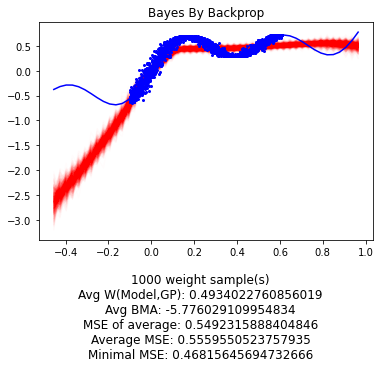

In [19]:
trainset.plot("Bayes By Backprop", bbb, gp, alpha=0.01, samples=1000, extra_range=0.5)